<a href="https://colab.research.google.com/github/juancapeto/Finanzas/blob/main/Aplicaci%C3%B3n_en_finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problematica:** Usted es científico de datos en “UdeA Insurance” y se le ha pedido que ayude al departamento de actuaria. Este ha estado recopilando datos históricos sobre los costos asociados a reclamaciones de servicios de salud. Les gustaría poder predecir las utilizaciones y los costos de servicios de salud, y así determinar el precio de un seguro de salud. Su tarea es utilizar los datos disponibles para construir un modelo de tarifación y un ayuda ventas. Recuerde que el departamento de actuaria tendrá más confianza en su trabajo si los resultados tienen sentido, para que no solo considere la precisión predictiva.

**Diseño de la solución**

1.	Modelo predictivo para el costo de seguro (tarifación para usuario)
2.	El vendedor ingresa la información de la persona interesada.
3.	El modelo arroja el costo estimado de seguro.
4.	El vendedor da el precio final de venta de seguro al interesado.
5.	El interesado acepta el seguro
   5.1	Queda asegurado
6.	El interesado no acepta el seguro


# **Carga de datos**

In [ ]:
#Importar datos desde drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#librerias
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import datetime
import seaborn as sns
from matplotlib import colorbar
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn import tree 
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error  #errores
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
conn=sql.connect('/content/drive/MyDrive/Analítica/Analítica III/Aplicaciones en finanzas/BD_insurance2019dataset.db') #carga bd
cur=conn.cursor()                           #para ejecutar sql

In [ ]:
Tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
Tablas        #mirar tablas

,name
0,reclamaciones
1,diagnosticos
2,regional
3,genero
4,sociodemograficas
5,utilizaciones


# **Tabla Reclamaciones**

**Reclamaciones**

In [ ]:
#Seleccionar tabla de reclamaciones
reclamaciones= pd.read_sql("SELECT * FROM reclamaciones", conn)
reclamaciones.columns=reclamaciones.columns.str.lower()  #poner nombre de columnas en minusculas
#reclamaciones.to_sql("reclamaciones",conn,if_exists='replace') #guardar como tabla
reclamaciones    #reclamaciones

,reclamacion_id,reclamacion_desc
0,1,ATENCION DEL PARTO
1,2,ATENCION INTEGRAL DE SALUD MENTAL
2,3,CIRUGIA AMBULATORIA POR ACCIDENTE
3,4,CIRUGIA AMBULATORIA POR ENFERMEDAD
4,5,CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA
5,6,COBERTURA PROGRAMA PALIATIVOS
6,7,CONCILIACION
7,8,CONSULTA DE URGENCIAS
8,9,CONSULTA EXTERNA
9,10,CONSULTAS PRENATALES


In [ ]:
reclamaciones.duplicated().sum() #no hay duplicados

0

In [ ]:
reclamaciones['reclamacion_desc'].value_counts() #hay una categoria sin informacion

ATENCION DEL PARTO                                                 1
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                     1
TRATAMIENTO AMBULATORIO POR CANCER                                 1
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                      1
TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS         1
TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE                      1
TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y COMPLICACIONES        1
TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBARAZO    1
TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO                        1
Sin Informacion                                                    1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE                  1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES    1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                 1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA       1
TRATAMIENTOS AMBULATORIOS ESPECIAL

# **Tabla Diagnosticos**

**Diagnosticos**

In [ ]:
#Seleccionar tabla de diagnosticos
diagnosticos= pd.read_sql("SELECT* FROM diagnosticos", conn)
diagnosticos.columns=diagnosticos.columns.str.lower()  #poner nombre de columnas en minusculas
#diagnosticos.to_sql("diagnosticos",conn,if_exists='replace') #guardar como tabla
diagnosticos  #tabla de diagnosticos

,diagnostico_codigo,diagnostico_desc
0,-1,Sin Información
1,0,DIAGNÓSTICO PENDIENTE
2,9,DIAGNÓSTICO PENDIENTE
3,A010,FIEBRE TIFOIDEA
4,A021,SEPTICEMIA DEBIDA A SALMONELLA
...,...,...
2719,Z961,PRESENCIA DE LENTES INTRAOCULARES
2720,Z966,PRESENCIA DE IMPLANTE ORTOPÉDICO ARTICULAR
2721,Z975,PRESENCIA DE DISPOSITIVO ANTICONCEPTIVO (INTRA...
2722,Z980,ESTADO DE DERIVACIÓN INTESTINAL O ANASTOMOSIS


In [ ]:
diagnosticos.duplicated().sum() #no hay duplicados

0

In [ ]:
diagnosticos['diagnostico_desc'].unique()   #hay dos categorias iguales y una sin informacion

array(['Sin Información', 'DIAGNÓSTICO PENDIENTE', 'FIEBRE TIFOIDEA', ...,
       'PRESENCIA DE DISPOSITIVO ANTICONCEPTIVO (INTRAUTERINO)',
       'ESTADO DE DERIVACIÓN INTESTINAL O ANASTOMOSIS',
       'OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS'], dtype=object)

In [ ]:
diagnosticos['diagnostico_desc'].value_counts()

APENDICITIS, NO ESPECIFICADA                                   2
EDEMA PULMONAR                                                 2
QUERATOSIS SEBORREICA                                          2
SÍNCOPE Y COLAPSO                                              2
CUERPO EXTRAÑO EN EL OÍDO                                      2
                                                              ..
INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFICACIÓN           1
INFARTO AGUDO DEL MIOCARDIO                                    1
INFARTO SUBSECUENTE DEL MIOCARDIO, DE PARTE NO ESPECIFICADA    1
OTRAS FORMAS DE ENFERMEDAD ISQUÉMICA AGUDA DEL CORAZÓN         1
OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS                    1
Name: diagnostico_desc, Length: 2700, dtype: int64

# **Tabla Regional**

In [ ]:
#Seleccionar tabla de regional
regional= pd.read_sql("SELECT* FROM regional", conn)
regional.columns=regional.columns.str.lower()  #poner nombre de columnas en minusculas
#regional.to_sql("regional",conn,if_exists='replace') #guardar como tabla
regional    #tabla de regional

,regional_id,regional_desc
0,1,REGIONAL ANTIOQUIA
1,2,REGIONAL CENTRO
2,3,REGIONAL NORTE
3,4,REGIONAL OCCIDENTE
4,5,REGIONAL EJE CAFETERO
5,6,Sin Información


# **Tabla Genero**

**Genero**

In [ ]:
#Seleccionar tabla de genero
genero= pd.read_sql("SELECT* FROM genero", conn)
genero.columns=genero.columns.str.lower()  #poner nombre de columnas en minusculas
#genero.to_sql("genero",conn,if_exists='replace') #guardar como tabla
genero    #tabla de genero

,sexo_cd,sexo_desc
0,M,Masculino
1,F,Femenino
2,-1,Sin Informacion


# **Tabla Sociodemograficas**

**Sociodemograficas**

In [ ]:
#Seleccionar tabla de sociodemograficas
sociodemograficas= pd.read_sql("SELECT* FROM sociodemograficas", conn)
sociodemograficas.columns=sociodemograficas.columns.str.lower()  #poner nombre de columnas en minusculas
sociodemograficas.head()     #tabla de sociodemograficas

,afiliado_id,sexo_codigo,fechanacimiento,regional_codigo,cancer,epoc,diabetes,hipertension,enf_cardiovascular
0,738288,M,28072,1,0,0,0,0,0
1,738294,M,23392,2,0,0,0,0,0
2,738303,F,27177,3,0,0,0,0,0
3,738318,M,15053,2,1,0,1,1,0
4,738323,F,10447,2,0,0,0,1,0


In [ ]:
sociodemograficas.duplicated().sum() #no hay duplicados

0

In [ ]:
#convertir tipo fecha nacimiento
sociodemograficas['fechanacimiento'] =sociodemograficas['fechanacimiento'].apply(lambda x: datetime.datetime(1899, 12, 30) + datetime.timedelta(days=x))

In [ ]:
# extraer columna de edad 
sociodemograficas['edad']= 2023-sociodemograficas['fechanacimiento'].dt.year

In [ ]:
sociodemograficas['edad'].value_counts()   #hay una edad negativa

 43     5558
 42     5535
 39     5470
 41     5403
 40     5279
        ... 
 0         2
 105       2
 106       2
 109       1
-1         1
Name: edad, Length: 109, dtype: int64

In [ ]:
sociodemograficas.describe() #estadistica

,afiliado_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad
count,2.182050e+05,218205.000000,218205.000000,218205.000000,218205.000000,218205.000000,218205.000000
mean,2.470483e+07,0.019014,0.005114,0.014844,0.069600,0.004047,36.863165
std,1.694923e+07,0.136575,0.071332,0.120928,0.254472,0.063485,19.479943
min,7.382880e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,8.569969e+06,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,2.350590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000
75%,3.913018e+07,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
max,5.957157e+07,1.000000,1.000000,1.000000,1.000000,1.000000,109.000000


In [ ]:
#Poner la edad promedio si la resta es un valor menor a cero
sociodemograficas.loc[sociodemograficas[sociodemograficas.edad<=0].index,['edad']]=36
sociodemograficas['edad'].value_counts() #verifico

43     5558
42     5535
39     5470
41     5403
40     5279
       ... 
104       4
103       4
106       2
105       2
109       1
Name: edad, Length: 107, dtype: int64

In [ ]:
#Función para categorizar la edad 
def categorizar(fila):
    edad = fila.edad
    if edad  <=6:
      return 'Primera infancia'
    elif edad <=11:
      return 'Infancia'
    elif edad <=18:
      return 'Adolescencia'
    elif edad <=28:
      return 'Jovenes'
    elif edad <=59:
      return'Adultez'
    elif edad >=60:
      return 'Persona Mayor'

In [ ]:
#Crear variable rango de vida donde se aplica la función categorizar para clasificar los datos 
sociodemograficas["rangodevida"] = sociodemograficas.apply(categorizar, axis=1)

In [ ]:
sociodemograficas['sexo_codigo'].value_counts()  #sexo dejar en 2 categorias

F     119253
M      98951
-1         1
Name: sexo_codigo, dtype: int64

In [ ]:
sociodemograficas['sexo_codigo']=sociodemograficas['sexo_codigo'].replace('-1','F')  #hay un tipo de sexo fuera de lo comun, lo imputo con el sexo femenino
sociodemograficas['sexo_codigo'].value_counts() 

F    119254
M     98951
Name: sexo_codigo, dtype: int64

In [ ]:
sociodemograficas.isnull().sum()

afiliado_id           0
sexo_codigo           0
fechanacimiento       0
regional_codigo       0
cancer                0
epoc                  0
diabetes              0
hipertension          0
enf_cardiovascular    0
edad                  0
rangodevida           0
dtype: int64

In [ ]:
sociodemograficas.head()

,afiliado_id,sexo_codigo,fechanacimiento,regional_codigo,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez
1,738294,M,1964-01-16,2,0,0,0,0,0,59,Adultez
2,738303,F,1974-05-28,3,0,0,0,0,0,49,Adultez
3,738318,M,1941-03-18,2,1,0,1,1,0,82,Persona Mayor
4,738323,F,1928-08-07,2,0,0,0,1,0,95,Persona Mayor


# **Tabla Utilizaciones**

**Utilizaciones**

In [ ]:
#Seleccionar tabla de utilizaciones
utilizaciones= pd.read_sql("SELECT* FROM utilizaciones", conn)
utilizaciones.columns=utilizaciones.columns.str.lower()  #poner nombre de columnas en minusculas
#utilizaciones.to_sql("utilizaciones",conn,if_exists='replace') #guardar como tabla
utilizaciones

,fecha_reclamacion,afiliado_id,reclamacion_codigo,diagnostico_codigo,cantidad,precio
0,23/10/2019,22914637,12,M45X,1.0,1056639.96
1,26/11/2019,58412744,9,9,1.0,139772.80
2,23/10/2019,5070923,16,9,1.0,320166.76
3,27/11/2019,5769950,13,9,1.0,21204.00
4,8/11/2019,24022833,12,K589,1.0,60636.00
...,...,...,...,...,...,...
395863,14/11/2019,4351189,16,9,15.0,251820.44
395864,7/9/2019,44677250,9,9,1.0,67208.00
395865,25/10/2019,19220270,13,9,10.0,475726.00
395866,11/12/2019,25627716,12,9,2.0,568788.00


In [ ]:
utilizaciones.duplicated().sum() #no hay duplicados

0

In [ ]:
#formato fecha reclamacion

utilizaciones['fecha_reclamacion'] = pd.to_datetime(utilizaciones['fecha_reclamacion'])

In [ ]:
utilizaciones.head() #verifico

,fecha_reclamacion,afiliado_id,reclamacion_codigo,diagnostico_codigo,cantidad,precio
0,2019-10-23,22914637,12,M45X,1.0,1056639.96
1,2019-11-26,58412744,9,9,1.0,139772.80
2,2019-10-23,5070923,16,9,1.0,320166.76
3,2019-11-27,5769950,13,9,1.0,21204.00
4,2019-08-11,24022833,12,K589,1.0,60636.00


#**Union de dataframe por medio de una key**

**Se pueden unir los dataframe por medio de columnas en común para dejar una sola tabla con toda la información que se necesita para explorar.**

**union 1: Dataframe sociodemograficas y utilizaciones por medio de afiliado id**

In [ ]:
union1=pd.merge(left=sociodemograficas,right=utilizaciones, left_on='afiliado_id', right_on='afiliado_id')
union1.head()

,afiliado_id,sexo_codigo,fechanacimiento,regional_codigo,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-12-20,9,9,1.0,1984.00
2,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-11-21,9,9,1.0,85312.00
3,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76
4,738294,M,1964-01-16,2,0,0,0,0,0,59,Adultez,2019-10-30,9,9,1.0,38328.40


**Union 2: será union1 con regional por medio de regional_id**

In [ ]:
union1 = union1.rename(columns={'regional_codigo':'regional_id'}) #cambiar nombre de columna

In [ ]:
regional['regional_id']=regional['regional_id'].astype('int64') #convetir tipo de variable
union1['regional_id']=union1['regional_id'].astype('int64')

In [ ]:
union2=pd.merge(left=union1,right=regional, left_on='regional_id', right_on='regional_id')
union2.head()   #union

,afiliado_id,sexo_codigo,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio,regional_desc
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00,REGIONAL ANTIOQUIA
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-12-20,9,9,1.0,1984.00,REGIONAL ANTIOQUIA
2,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-11-21,9,9,1.0,85312.00,REGIONAL ANTIOQUIA
3,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76,REGIONAL ANTIOQUIA
4,738358,F,1960-03-12,1,1,0,0,0,0,63,Persona Mayor,2019-10-22,20,F321,1.0,297897.60,REGIONAL ANTIOQUIA


**Union3: será union2 con diagnosticos**

In [ ]:
union3=pd.merge(left=union2,right=diagnosticos, left_on='diagnostico_codigo', right_on='diagnostico_codigo')
union3.head()

,afiliado_id,sexo_codigo,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio,regional_desc,diagnostico_desc
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-12-20,9,9,1.0,1984.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE
2,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-11-21,9,9,1.0,85312.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE
3,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE
4,738358,F,1960-03-12,1,1,0,0,0,0,63,Persona Mayor,2019-11-18,9,9,1.0,85312.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE


**union4: union 3 con reclamaciones**

In [ ]:
reclamaciones= reclamaciones.rename(columns={'reclamacion_id':'reclamacion_codigo'}) #cambiar nombre de columna

In [ ]:
#cambiar categoria de variable para poder hacer la union

union3['reclamacion_codigo']=union3['reclamacion_codigo'].astype('int')

In [ ]:
# union4, union 3 con reclamaciones en reclamacion_id

df=pd.merge(left=union3,right=reclamaciones, left_on='reclamacion_codigo', right_on='reclamacion_codigo')
df.head()  #dataframe final

,afiliado_id,sexo_codigo,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio,regional_desc,diagnostico_desc,reclamacion_desc
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
2,738377,M,1972-05-20,1,0,0,0,0,0,51,Adultez,2019-08-11,8,9,1.0,254863.40,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
3,738872,F,1953-11-16,1,0,0,0,0,0,70,Persona Mayor,2019-06-10,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
4,738920,F,1958-02-22,1,0,0,0,0,0,65,Persona Mayor,2019-10-17,8,9,1.0,15996.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS


In [ ]:
df.columns

Index(['afiliado_id', 'sexo_codigo', 'fechanacimiento', 'regional_id',
       'cancer', 'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular',
       'edad', 'rangodevida', 'fecha_reclamacion', 'reclamacion_codigo',
       'diagnostico_codigo', 'cantidad', 'precio', 'regional_desc',
       'diagnostico_desc', 'reclamacion_desc'],
      dtype='object')

In [ ]:
df.shape

(390992, 19)

# **Limpieza y transformación del dataframe**

In [ ]:
df.head()

,afiliado_id,sexo_codigo,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio,regional_desc,diagnostico_desc,reclamacion_desc
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
2,738377,M,1972-05-20,1,0,0,0,0,0,51,Adultez,2019-08-11,8,9,1.0,254863.40,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
3,738872,F,1953-11-16,1,0,0,0,0,0,70,Persona Mayor,2019-06-10,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
4,738920,F,1958-02-22,1,0,0,0,0,0,65,Persona Mayor,2019-10-17,8,9,1.0,15996.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS


In [ ]:
df.info()  #tipos de variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390992 entries, 0 to 390991
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   afiliado_id         390992 non-null  int64         
 1   sexo_codigo         390992 non-null  object        
 2   fechanacimiento     390992 non-null  datetime64[ns]
 3   regional_id         390992 non-null  int64         
 4   cancer              390992 non-null  int64         
 5   epoc                390992 non-null  int64         
 6   diabetes            390992 non-null  int64         
 7   hipertension        390992 non-null  int64         
 8   enf_cardiovascular  390992 non-null  int64         
 9   edad                390992 non-null  int64         
 10  rangodevida         390992 non-null  object        
 11  fecha_reclamacion   390992 non-null  datetime64[ns]
 12  reclamacion_codigo  390992 non-null  int64         
 13  diagnostico_codigo  390992 no

In [ ]:
# mirar nulos

df.isnull().sum()   #NO HAY NULOS

afiliado_id           0
sexo_codigo           0
fechanacimiento       0
regional_id           0
cancer                0
epoc                  0
diabetes              0
hipertension          0
enf_cardiovascular    0
edad                  0
rangodevida           0
fecha_reclamacion     0
reclamacion_codigo    0
diagnostico_codigo    0
cantidad              0
precio                0
regional_desc         0
diagnostico_desc      0
reclamacion_desc      0
dtype: int64

In [ ]:
# mirar duplicados

df.duplicated().sum() #no hay duplicados

0

In [ ]:
df.head()

,afiliado_id,sexo_codigo,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio,regional_desc,diagnostico_desc,reclamacion_desc
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
2,738377,M,1972-05-20,1,0,0,0,0,0,51,Adultez,2019-08-11,8,9,1.0,254863.40,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
3,738872,F,1953-11-16,1,0,0,0,0,0,70,Persona Mayor,2019-06-10,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
4,738920,F,1958-02-22,1,0,0,0,0,0,65,Persona Mayor,2019-10-17,8,9,1.0,15996.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS


**Análisis de categorias**

In [ ]:
df.shape

(390992, 19)

In [ ]:
# filtrar solo usuarios donde la fecha reclamacion sea mayor a la de nacimiento
df = df[df['fecha_reclamacion'].dt.year>df['fechanacimiento'].dt.year]

In [ ]:
df.shape  #verifico

(381470, 19)

**Regionales**

In [ ]:
df['regional_desc'].value_counts()   #regionales

REGIONAL CENTRO          204466
REGIONAL OCCIDENTE        63621
REGIONAL ANTIOQUIA        60707
REGIONAL NORTE            41823
REGIONAL EJE CAFETERO     10799
Sin Información              54
Name: regional_desc, dtype: int64

In [ ]:
#la categoria sin informacion se considera inf nulo, por lo tanto, pasan a ser de la regional con mayor reclamos

df['regional_desc']=df['regional_desc'].replace('Sin Información','REGIONAL CENTRO')

In [ ]:
df['regional_desc'].value_counts() #verifico

REGIONAL CENTRO          204520
REGIONAL OCCIDENTE        63621
REGIONAL ANTIOQUIA        60707
REGIONAL NORTE            41823
REGIONAL EJE CAFETERO     10799
Name: regional_desc, dtype: int64

**Diagnosticos**

In [ ]:
#la columna de diagnostico contiene dos categorias iguales con diferente codigo de diagnostico, por lo tanto se unen para generar una sola categoria
df['diagnostico_codigo'].value_counts()

9       330471
Z108      6470
Z017      6346
E039      2419
E139      1078
         ...  
K669         1
S632         1
L730         1
H201         1
V392         1
Name: diagnostico_codigo, Length: 2640, dtype: int64

In [ ]:
df['diagnostico_codigo']=df['diagnostico_codigo'].replace({'0':'9'}) #se imputan el codigo de 0 por 9

In [ ]:
df['diagnostico_codigo'].value_counts()  #verifico

9       330488
Z108      6470
Z017      6346
E039      2419
E139      1078
         ...  
K669         1
S632         1
L730         1
H201         1
V392         1
Name: diagnostico_codigo, Length: 2639, dtype: int64

**Reclamaciones**

In [ ]:
df['reclamacion_desc'].value_counts() 

CONSULTA EXTERNA                                                   146034
EXAMENES DE DIAGNOSTICO                                             71255
LABORATORIO CLINICO                                                 55288
FISIOTERAPIA ILIMITADA                                              37490
CONSULTA DE URGENCIAS                                               36749
CIRUGIA AMBULATORIA POR ENFERMEDAD                                   9444
TRATAMIENTOS ESPECIFICOS                                             6802
CONSULTAS PRENATALES                                                 3807
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                        3447
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                       2122
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                   1618
CIRUGIA AMBULATORIA POR ACCIDENTE                                    1414
INFILTRACIONES                                                       1239
TRATAMIENTO AMBULATORIO POR CANCER    

In [ ]:
#la categoria sin informacion se considera inf nulo, por lo tanto, pasan a ser de la reclamacion mas frecuente con mayor usuarios

df['reclamacion_desc']=df['reclamacion_desc'].replace('Sin Informacion','CONSULTA EXTERNA')

In [ ]:
df['reclamacion_desc'].value_counts() #verifico

CONSULTA EXTERNA                                                   146803
EXAMENES DE DIAGNOSTICO                                             71255
LABORATORIO CLINICO                                                 55288
FISIOTERAPIA ILIMITADA                                              37490
CONSULTA DE URGENCIAS                                               36749
CIRUGIA AMBULATORIA POR ENFERMEDAD                                   9444
TRATAMIENTOS ESPECIFICOS                                             6802
CONSULTAS PRENATALES                                                 3807
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                        3447
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                       2122
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                   1618
CIRUGIA AMBULATORIA POR ACCIDENTE                                    1414
INFILTRACIONES                                                       1239
TRATAMIENTO AMBULATORIO POR CANCER    

In [ ]:
#extraer en columna año de reclamacion
df['yearreclamacion']= df['fecha_reclamacion'].dt.year

**Después de haber unido los dataframes por medio de unos id en común, se cre un dataframe final df para proceder a realizar un análisis exploratorio.**

# **Análisis exploratorio**

In [ ]:
# guardar el df como tabla 
df.to_sql("data",conn,if_exists='replace') #guardar como tabla

381470

In [ ]:
df.shape

(381470, 20)

In [ ]:
df.head()

,afiliado_id,sexo_codigo,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,fecha_reclamacion,reclamacion_codigo,diagnostico_codigo,cantidad,precio,regional_desc,diagnostico_desc,reclamacion_desc,yearreclamacion
0,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-10-20,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,2019
1,738288,M,1976-11-08,1,0,0,0,0,0,47,Adultez,2019-07-11,8,9,1.0,45692.76,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,2019
2,738377,M,1972-05-20,1,0,0,0,0,0,51,Adultez,2019-08-11,8,9,1.0,254863.40,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,2019
3,738872,F,1953-11-16,1,0,0,0,0,0,70,Persona Mayor,2019-06-10,8,9,1.0,91140.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,2019
4,738920,F,1958-02-22,1,0,0,0,0,0,65,Persona Mayor,2019-10-17,8,9,1.0,15996.00,REGIONAL ANTIOQUIA,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,2019


**Afiliados**

In [ ]:
afiliados=pd.read_sql("select afiliado_id as afiliado,sexo_codigo,count(*) as totalreclamaciones from data group by afiliado_id order by totalreclamaciones desc",conn)
afiliados

,afiliado,sexo_codigo,totalreclamaciones
0,24695323,F,173
1,56682173,M,124
2,9732625,M,60
3,32520762,F,52
4,40867244,M,51
...,...,...,...
118437,738651,F,1
118438,738485,F,1
118439,738464,M,1
118440,738449,F,1


In [ ]:
afiliados.groupby(['sexo_codigo']).count()  # ¿ cuantos afiliados hay ?

,afiliado,totalreclamaciones
sexo_codigo,,
F,71050,71050
M,47392,47392


**Sexo**

In [ ]:
# ¿cual es el sexo con mayor participación en reclamos?

#reclaman mas las mujeres que los hombres
pd.read_sql("select sexo_codigo as sexo,count(*) as total from data group by sexo_codigo order by total desc",conn)

,sexo,total
0,F,240500
1,M,140970


In [ ]:

# ¿Cual sexo genera mas gasto?

base=df.groupby(['sexo_codigo'])[['precio']].sum().sort_values('precio', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'sexo_codigo', y='precio', color = 'sexo_codigo', barmode = 'group', title= 'Costo de seguro x Sexo')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Sexo',
    yaxis_title = 'Costo de seguro x Sexo',
    template = 'simple_white',
    title_x = 0.5)

fig.show()



**Reclamos**

In [ ]:
# ¿ cual es el año con mayor reclamacion?
pd.read_sql("select yearreclamacion as año_reclamacion,count(*) as total from data group by yearreclamacion order by total desc",conn)

,año_reclamacion,total
0,2019,380631
1,2018,794
2,2017,22
3,2016,13
4,2014,8
5,2015,2


**Regional**

In [ ]:
# ¿ cual es la unidad regional mas frecuente?

r=pd.read_sql("select regional_desc as regional,count(*) as total from data group by regional_desc order by total desc",conn)

#GRAFICAR
import plotly.graph_objs as go
a= go.Bar( x=r.regional	,y=r.total, text= r.total)
Layout=go.Layout(title="Reclamos por regional",xaxis={'title':' Regional'},yaxis={'title':'Total reclamaciones'})
go.Figure(a,Layout)

In [ ]:
# ¿Cual es el costo de cubrir seguro segun la region?

base=df.groupby(['regional_desc'])[['precio']].sum().sort_values('precio', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'regional_desc', y='precio', color = 'regional_desc', barmode = 'group', title= 'costos de seguro x regional')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Regional',
    yaxis_title = 'Costo de seguro x regional',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

**Diagnostico**

In [ ]:
# ¿ cual es el diagnostico mas frecuente?

r=pd.read_sql("select diagnostico_desc as diagnostico,count(*) as total from data group by diagnostico_desc order by total desc limit 5",conn)

#GRAFICAR
import plotly.graph_objs as go
a= go.Bar( x=r.diagnostico	,y=r.total, text= r.total)
Layout=go.Layout(title="Ranking de Views x años",xaxis={'title':' Regional'},yaxis={'title':'Total diagnosticos'})
go.Figure(a,Layout)

In [ ]:
# ¿Cual es el costo de cubrir seguro segun el diagnostico?

base=df.groupby(['diagnostico_desc'])[['precio']].sum().sort_values('precio', ascending = False).reset_index().head(6)

# crear gráfica
fig = px.bar(base, x = 'diagnostico_desc', y='precio', color = 'diagnostico_desc', barmode = 'group', title= 'costos de seguro x diagnostico')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Regional',
    yaxis_title = 'Costo de seguro x regional',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

**Reclamacion**

In [ ]:
# ¿ cual es la reclamacion mas frecuente?

pd.read_sql("select reclamacion_desc as reclamacion,count(*) as total from data group by reclamacion_desc order by total desc",conn)

,reclamacion,total
0,CONSULTA EXTERNA,146803
1,EXAMENES DE DIAGNOSTICO,71255
2,LABORATORIO CLINICO,55288
3,FISIOTERAPIA ILIMITADA,37490
4,CONSULTA DE URGENCIAS,36749
5,CIRUGIA AMBULATORIA POR ENFERMEDAD,9444
6,TRATAMIENTOS ESPECIFICOS,6802
7,CONSULTAS PRENATALES,3807
8,TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES,3447
9,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,2122


In [ ]:
# ¿Cual es la reclamacion  mas frecuente?

base=pd.read_sql("select reclamacion_desc as reclamacion,count(*) as total from data group by reclamacion_desc order by total desc limit 5",conn)

# crear gráfica
fig = px.bar(base, x = 'reclamacion', y='total', color = 'reclamacion', barmode = 'group', title= 'Reclamaciones mas frecuentes')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tipo reclamacion',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

In [ ]:
# ¿Cual es el costo de cubrir seguro segun la reclamacion?

base=df.groupby(['reclamacion_desc'])[['precio']].sum().sort_values('precio', ascending = False).reset_index().head(6)

# crear gráfica
fig = px.bar(base, x = 'reclamacion_desc', y='precio', color = 'reclamacion_desc', barmode = 'group', title= 'costos de seguro x reclamacion')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tipo reclamacion',
    yaxis_title = 'Costo de seguro x reclamacion',
    template = 'simple_white',
    title_x = 0.5)

**Edad**

In [ ]:
# ¿ Como está distribuida la edad de los usuarios?

r=pd.read_sql("select edad as edad,count(*) as total from data group by edad order by total desc",conn)

#GRAFICAR
import plotly.graph_objs as go
a= go.Bar( x=r.edad	,y=r.total, text= r.total)
Layout=go.Layout(title="Edad de los usuarios",xaxis={'title':' Edad'},yaxis={'title':'Total Reclamaciones'})
go.Figure(a,Layout)

#importante delimitar las edades de los usuarios, filtrar por un minimo y maximo

In [ ]:
# ¿ Como está distribuida el rango de los usuarios?

r=pd.read_sql("select rangodevida as rango,count(*) as total from data group by rangodevida order by total desc",conn)

#GRAFICAR
import plotly.graph_objs as go
a= go.Bar( x=r.rango	,y=r.total, text= r.total)
Layout=go.Layout(title="Edad de los usuarios",xaxis={'title':' Rango de vida'},yaxis={'title':'Total Reclamaciones'})
go.Figure(a,Layout)


In [ ]:
# ¿Cual es el costo de cubrir seguro segun el rango de edad?

base=df.groupby(['rangodevida'])[['precio']].sum().sort_values('precio', ascending = False).reset_index()
# crear gráfica
fig = px.bar(base, x = 'rangodevida', y='precio', color = 'rangodevida', barmode = 'group', title= 'costo de salud x rango de edad')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Rango de vida',
    yaxis_title = 'Costo de seguro x rango edad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# ¿Cual es el costo de cubrir seguro segun  edad?

base=df.groupby(['edad'])[['precio']].sum().sort_values('precio', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'edad', y='precio', color = 'edad', barmode = 'group', title= 'costos según el curso de vida por año')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title = 'Costo de seguro x  edad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

**Filtraciones**

In [ ]:
df.shape

(381470, 20)

In [ ]:
df.head()

In [ ]:
#filtrar usuarios con edades menores a 90
#df = df[df['edad']<90]

In [ ]:
df = df[df['yearreclamacion'] ==2019]  #filtrar solo año de reclamacion 2019

In [ ]:
df

#**Selección de variables**

In [ ]:
df.columns

Index(['afiliado_id', 'sexo_codigo', 'fechanacimiento', 'regional_id',
       'cancer', 'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular',
       'edad', 'rangodevida', 'fecha_reclamacion', 'reclamacion_codigo',
       'diagnostico_codigo', 'cantidad', 'precio', 'regional_desc',
       'diagnostico_desc', 'reclamacion_desc', 'yearreclamacion'],
      dtype='object')

In [ ]:
# modelo con variables adecuadas

df1=df[['precio', 'sexo_codigo',
        'regional_desc', 'cancer', 'epoc', 'diabetes', 'hipertension',
       'enf_cardiovascular', 'edad', 'rangodevida', 'cantidad',
       'diagnostico_desc', 'reclamacion_desc']]

In [ ]:
df1.head()

,precio,sexo_codigo,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,cantidad,diagnostico_desc,reclamacion_desc
0,91140.00,M,REGIONAL ANTIOQUIA,0,0,0,0,0,47,Adultez,1.0,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
1,45692.76,M,REGIONAL ANTIOQUIA,0,0,0,0,0,47,Adultez,1.0,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
2,254863.40,M,REGIONAL ANTIOQUIA,0,0,0,0,0,51,Adultez,1.0,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
3,91140.00,F,REGIONAL ANTIOQUIA,0,0,0,0,0,70,Persona Mayor,1.0,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS
4,15996.00,F,REGIONAL ANTIOQUIA,0,0,0,0,0,65,Persona Mayor,1.0,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS


<ipython-input-164-842ff3e5ef0d>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



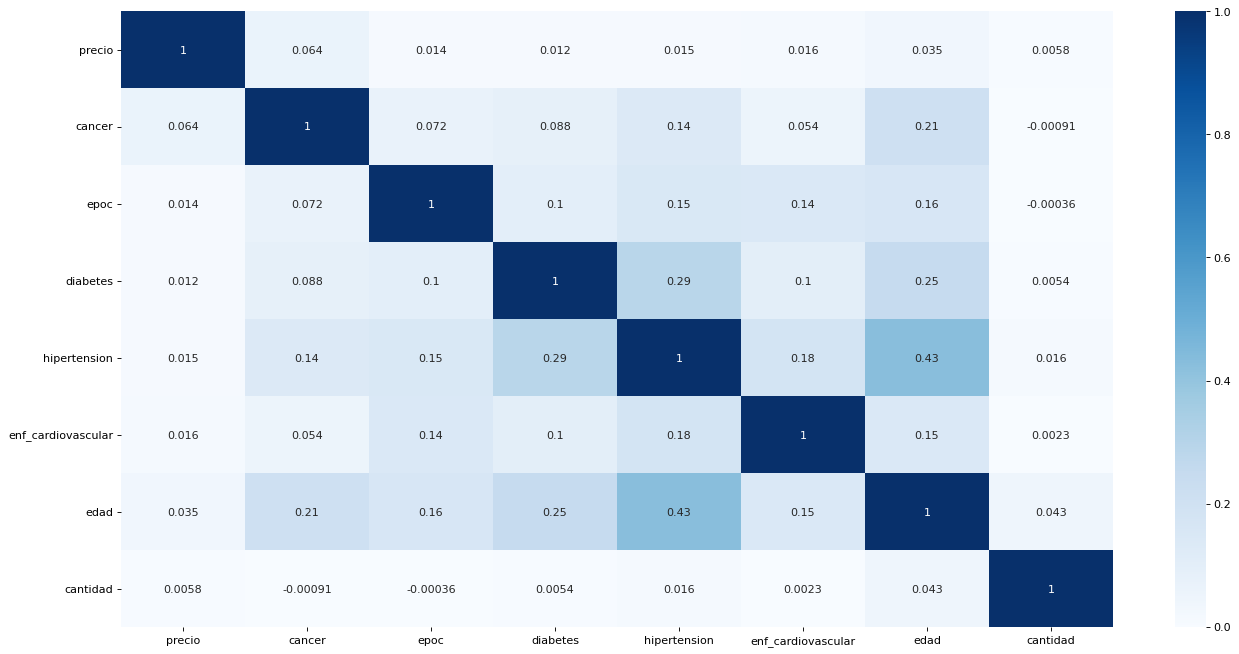

In [ ]:
        #CORRELACION 
figure(figsize=(20, 10), dpi=80);
sns.heatmap(df1.corr(), annot = True, cmap='Blues'); 

In [ ]:
#Variables categoricas a dummies
le = LabelEncoder()

df1['sexo_codigo'] = le.fit_transform(df1.sexo_codigo)
df1['rangodevida'] = le.fit_transform(df1.rangodevida)
df1['diagnostico_desc'] = le.fit_transform(df1.diagnostico_desc)
df1['regional_desc'] = le.fit_transform(df1.regional_desc)
df1['reclamacion_desc'] = le.fit_transform(df1.reclamacion_desc)

<ipython-input-165-3295981ed66c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-165-3295981ed66c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-165-3295981ed66c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-165-329

In [ ]:
#Variables Numéricas
scaler = MinMaxScaler()

df1[['edad']] = scaler.fit_transform(df1[['edad']])
df1[['precio']] = scaler.fit_transform(df1[['precio']])
df1[['cantidad']] = scaler.fit_transform(df1[['cantidad']])

<ipython-input-166-6510661e568c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-6510661e568c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-6510661e568c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head() #verifico

,precio,sexo_codigo,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,rangodevida,cantidad,diagnostico_desc,reclamacion_desc
0,0.000168,1,0,0,0,0,0,0,0.403846,1,0.004762,482,7
1,0.000084,1,0,0,0,0,0,0,0.403846,1,0.004762,482,7
2,0.000471,1,0,0,0,0,0,0,0.442308,1,0.004762,482,7
3,0.000168,0,0,0,0,0,0,0,0.625000,4,0.004762,482,7
4,0.000030,0,0,0,0,0,0,0,0.576923,4,0.004762,482,7


In [ ]:
df1.shape

(380631, 13)

In [ ]:
#Arreglo del modelo
arreglo = df1.values
X = arreglo[:,1:13]
y = arreglo[:,0]

In [ ]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.76190476e-03, 4.82000000e+02, 7.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.76190476e-03, 4.82000000e+02, 7.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.76190476e-03, 4.82000000e+02, 7.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.76190476e-03, 1.42100000e+03, 2.20000000e+01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.76190476e-03, 1.95000000e+03, 2.20000000e+01],
       [1.00000000e+00, 4.00000000e+00, 0.00000000e+00, ...,
        4.76190476e-03, 9.54000000e+02, 3.00000000e+01]])

In [ ]:
y

array([1.68461008e-04, 8.44551249e-05, 4.71091681e-04, ...,
       1.67060131e-02, 1.37091317e-02, 2.32712364e-02])

**Select kbest**

In [ ]:
#Seleccion de variables de acuerdo con las k puntuaciones más altas
prueba = SelectKBest(score_func=f_regression, k=10)
fit = prueba.fit(X,y)
print("Puntaje KBest ",fit.scores_)  #elegir variables de acuerdo a su correlacion
np.where(prueba.get_support())

Puntaje KBest  [2.07924461e+01 1.22133142e+00 1.58623461e+03 6.94867339e+01
 5.24558093e+01 8.00850975e+01 9.43124567e+01 4.58239527e+02
 1.37067712e+02 1.27703411e+01 8.11965305e+03 5.49161391e+03]


(array([ 0,  2,  3,  4,  5,  6,  7,  8, 10, 11]),)

**Recursive Feature Elimination**

In [ ]:
modelo = LinearRegression()
rfe = RFE(modelo, n_features_to_select=10)
fit = rfe.fit(X,y)
print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)



Nro. Features:  10
Features Seleccionados:  [ True False  True  True  True  True  True  True  True  True False  True]
Rankig de features:  [1 2 1 1 1 1 1 1 1 1 3 1]


In [ ]:
df1.columns

Index(['precio', 'sexo_codigo', 'regional_desc', 'cancer', 'epoc', 'diabetes',
       'hipertension', 'enf_cardiovascular', 'edad', 'rangodevida', 'cantidad',
       'diagnostico_desc', 'reclamacion_desc'],
      dtype='object')

In [ ]:
corr=df1.corr()    #CORRELACIÓN
corr["precio"].sort_values(ascending=False)

precio                1.000000
diagnostico_desc      0.144522
reclamacion_desc      0.119258
cancer                0.064421
edad                  0.034676
rangodevida           0.018973
enf_cardiovascular    0.015739
hipertension          0.014504
epoc                  0.013510
diabetes              0.011739
sexo_codigo           0.007391
cantidad              0.005792
regional_desc        -0.001791
Name: precio, dtype: float64

VARIABLES SELECCIONADAS: 'regional_desc', 'cancer', 'epoc', 'diabetes',
       'hipertension', 'enf_cardiovascular', 'edad','diagnostico_desc', 'reclamacion_desc' 

# Seleccion de modelo

In [ ]:
model=df1[['precio','epoc','cancer','diabetes', 'edad',
       'hipertension', 'enf_cardiovascular','diagnostico_desc', 'reclamacion_desc']]

In [ ]:
model.head()

,precio,epoc,cancer,diabetes,edad,hipertension,enf_cardiovascular,diagnostico_desc,reclamacion_desc
0,0.000168,0,0,0,0.403846,0,0,482,7
1,0.000084,0,0,0,0.403846,0,0,482,7
2,0.000471,0,0,0,0.442308,0,0,482,7
3,0.000168,0,0,0,0.625000,0,0,482,7
4,0.000030,0,0,0,0.576923,0,0,482,7


In [ ]:
model.shape

(380631, 9)

In [ ]:
#Arreglo del modelo
arreglo = model.values
X = arreglo[:,1:9]         #arreglos
y = arreglo[:,0]

In [ ]:
X

array([[   0.,    0.,    0., ...,    0.,  482.,    7.],
       [   0.,    0.,    0., ...,    0.,  482.,    7.],
       [   0.,    0.,    0., ...,    0.,  482.,    7.],
       ...,
       [   0.,    0.,    0., ...,    0., 1421.,   22.],
       [   0.,    0.,    0., ...,    0., 1950.,   22.],
       [   0.,    0.,    0., ...,    0.,  954.,   30.]])

**Modelos: regresion lineal, random forest, gd, decisiontree**

In [ ]:
#Separar conjuntos de entrenamiento y pruebas
pPruebas = 0.33
semilla = 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

# **Decision  tree**

In [ ]:
decision_tree = DecisionTreeRegressor()  #modelo
y_hat = decision_tree.fit(X_train, y_train).predict(X_test) #ajustar modelo

#evaluacion desempeño
print('El score en el entrenamiento es: {:.2f}'.format(decision_tree.score(X_train, y_train)*100))
print('El score en la prueba es: {:.2f}'.format(decision_tree.score(X_test, y_test)*100))

#metrica desempeño
print('El error cuadrático medio es: {:.5f}'.format(mean_squared_error(y_test, y_hat)))
print('El error absoluto medio es {:.5f}'.format(mean_absolute_error(y_test, y_hat)))
print('El r cuadrado es: {:.5f}'.format(r2_score(y_test, y_hat)))

El score en el entrenamiento es: 97.10
El score en la prueba es: -108.01
El error cuadrático medio es: 0.00002
El error absoluto medio es 0.00045
El r cuadrado es: -1.08009


# **Linear Regression**

In [ ]:
linear = LinearRegression()  #modelo
y_hat = linear.fit(X_train, y_train).predict(X_test)  #prediccion

#evaluacion desempeño
print('El score en el entrenamiento es: {:.2f}'.format(linear.score(X_train, y_train)*100))
print('El score en la prueba es: {:.2f}'.format(linear.score(X_test, y_test)*100))

#metrica desempeño
print('El error cuadrático medio es: {:.5f}'.format(mean_squared_error(y_test, y_hat)))
print('El error absoluto medio es {:.5f}'.format(mean_absolute_error(y_test, y_hat)))
print('El r cuadrado es: {:.5f}'.format(r2_score(y_test, y_hat)))

El score en el entrenamiento es: 3.21
El score en la prueba es: 3.95
El error cuadrático medio es: 0.00001
El error absoluto medio es 0.00063
El r cuadrado es: 0.03952


#**Random Forest**

In [ ]:
rf= RandomForestRegressor()  #modelo
y_hat = rf.fit(X_train, y_train).predict(X_test)

#evaluacion desempeño
print('El score en el entrenamiento es: {:.2f}'.format(rf.score(X_train, y_train)*100))
print('El score en la prueba es: {:.2f}'.format(rf.score(X_test, y_test)*100))

#metrica desempeño
print('El error cuadrático medio es: {:.5f}'.format(mean_squared_error(y_test, y_hat)))
print('El error absoluto medio es {:.5f}'.format(mean_absolute_error(y_test, y_hat)))
print('El r cuadrado es: {:.5f}'.format(r2_score(y_test, y_hat)))

El score en el entrenamiento es: 87.18
El score en la prueba es: -1.32
El error cuadrático medio es: 0.00001
El error absoluto medio es 0.00041
El r cuadrado es: -0.01324


#**Grandient Boost**

In [ ]:
gd= GradientBoostingRegressor()  #modelo
y_hat = gd.fit(X_train, y_train).predict(X_test)

#evaluacion desempeño
print('El score en el entrenamiento es: {:.2f}'.format(gd.score(X_train, y_train)*100))
print('El score en la prueba es: {:.2f}'.format(gd.score(X_test, y_test)*100))

#metrica desempeño
print('El error cuadrático medio es: {:.5f}'.format(mean_squared_error(y_test, y_hat)))
print('El error absoluto medio es {:.5f}'.format(mean_absolute_error(y_test, y_hat)))
print('El r cuadrado es: {:.5f}'.format(r2_score(y_test, y_hat)))

El score en el entrenamiento es: 41.28
El score en la prueba es: 14.12
El error cuadrático medio es: 0.00001
El error absoluto medio es 0.00042
El r cuadrado es: 0.14124


# **Modelo Seleccionado: Random Forest**

El mejor modelo en precision y con menores errores en desempeños, fue el modelo random forest.

**Afinamiento de hiperparametros**

In [ ]:
modelo=RandomForestRegressor()  #parametros e hiperparametros
modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'bootstrap': [True, False], 
              'max_depth': [10, 60], # profundidad maxima que puede alcanzar los arboles
              'max_features': ['auto', 'sqrt'], #número de predictores considerados a en cada división
              'min_samples_leaf': [10, 20], #número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división
              'min_samples_split': [2, 5], #número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. 
              'n_estimators': [5, 10]#numero de arboles incluidos en el modelo
              }

In [ ]:
#Búsqueda por grid search con validación cruzada

hyp_RFR = RandomizedSearchCV(RandomForestRegressor(), param_distributions = param_grid, n_iter = 20, scoring = "neg_mean_squared_error" )
hyp_RFR.fit(X,y)          

resultados = hyp_RFR.cv_results_
hyp_RFR.best_params_
pd_resultados = pd.DataFrame(resultados)
print(pd_resultados[['params','mean_test_score']].min())
print('-------------------------')
print(pd_resultados[['params','mean_test_score']])

In [ ]:
resultados = hyp_RFR.cv_results_
hyp_RFR.best_params_
pd_resultados = pd.DataFrame(resultados)
pd_resultados[['params','mean_test_score']]

modelo_RFR =  hyp_RFR.best_estimator_    # Modelo con los mejores hiperparametros
modelo_RFR  

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=20,
                      n_estimators=10)

In [ ]:
#modelo final

modelrf= RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=20,
                      n_estimators=10) #modelo

y_hat = modelrf.fit(X_train, y_train).predict(X_test)

#evaluacion desempeño
print('El score en el entrenamiento es: {:.2f}'.format(modelrf.score(X_train, y_train)*100))
print('El score en la prueba es: {:.2f}'.format(modelrf.score(X_test, y_test)*100))

#metrica desempeño
print('El error cuadrático medio es: {:.5f}'.format(mean_squared_error(y_test, y_hat)))
print('El error absoluto medio es {:.5f}'.format(mean_absolute_error(y_test, y_hat)))
print('El r cuadrado es: {:.5f}'.format(r2_score(y_test, y_hat)))

El score en el entrenamiento es: 20.08
El score en la prueba es: 24.24
El error cuadrático medio es: 0.00001
El error absoluto medio es 0.00046
El r cuadrado es: 0.24245


Despliegue del modelo

In [ ]:
#Guardar el modelo en formato pkl
import joblib
joblib.dump(modelrf, "modelfinal.pkl")

['modelfinal.pkl']

In [ ]:
#Cargar el modelo
modelfinal = joblib.load("modelfinal.pkl")